In [247]:
from sodapy import Socrata
import pandas as pd
import matplotlib.pyplot as plt
import requests
import geopandas
from shapely.geometry import Point

In [248]:
#access data from city of chicago API and convert request data to pandas dataframe

In [249]:
#get 2017 and 2018 crime data
client = Socrata("data.cityofchicago.org", "HfV6h8Xj9GdgDGkPS9JEkKvlp")
crimes_id = "6zsd-86xi"
response_crimes = client.get(crimes_id, where="year between 2017 and 2018", limit=800000)
crimes_2017_2018_df = pd.DataFrame.from_records(response_crimes)

In [250]:
#get community area name data
community_area_id = "igwz-8jzy"
response_cas = client.get(community_area_id)
community_areas_df = pd.DataFrame.from_records(response_cas)
community_areas_df['community_area'] = community_areas_df['area_num_1']
community_areas_to_merge = community_areas_df[['community_area', 'community']]

In [251]:
#merging in community area names
crime_with_cas = pd.merge(crimes_2017_2018_df, community_areas_to_merge, on="community_area")
#checking NAs in variables
crime_with_cas.isna().any()

arrest                  False
beat                    False
block                   False
case_number             False
community_area          False
date                    False
description             False
district                 True
domestic                False
fbi_code                False
id                      False
iucr                    False
latitude                 True
location                 True
location_description     True
longitude                True
primary_type            False
updated_on              False
ward                     True
x_coordinate             True
y_coordinate             True
year                    False
community               False
dtype: bool

In [252]:
#since there are no NAs in the primary type variable I can use size to determine the counts
crime_by_type = crime_with_cas.groupby('primary_type').size().reset_index(name="count")
crime_by_type['percent'] = crime_by_type['count']/crimes_2017_2018_df.shape[0]
crime_by_type.sort_values(by = 'percent', ascending=False)

,primary_type,count,percent
30,THEFT,129428,0.242205
2,BATTERY,98995,0.185254
6,CRIMINAL DAMAGE,56848,0.106383
1,ASSAULT,39678,0.074252
8,DECEPTIVE PRACTICE,37761,0.070664
23,OTHER OFFENSE,34357,0.064294
3,BURGLARY,24731,0.046280
17,NARCOTICS,24645,0.046119
27,ROBBERY,21560,0.040346
16,MOTOR VEHICLE THEFT,21394,0.040036


In [253]:
#what percentage of crimes result in an arrest?

In [254]:
grouped_arrest = crime_with_cas.groupby('arrest').size()/crime_with_cas.shape[0]
grouped_arrest

arrest
False    0.803577
True     0.196423
dtype: float64

In [255]:
#how seasonal are crimes? has the crime rate gone down over time?

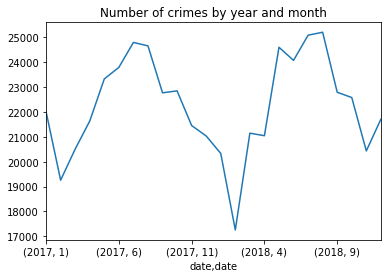

In [256]:
crime_by_month = crime_with_cas.groupby([pd.to_datetime(crime_with_cas['date']).dt.year, pd.to_datetime(crime_with_cas['date']).dt.month]).size()
crime_by_month.plot(kind="line", title= "Number of crimes by year and month")
#fix axis

In [257]:
#how do the number of crimes differ by community area?

In [258]:
crime_by_area = crime_with_cas.groupby('community').size().reset_index(name="count")
crime_by_area.sort_values(by='count', ascending=False)

,community,count
5,AUSTIN,30429
47,NEAR NORTH SIDE,25367
41,LOOP,21480
49,NEAR WEST SIDE,18448
52,NORTH LAWNDALE,18377
65,SOUTH SHORE,17325
32,HUMBOLDT PARK,16095
75,WEST TOWN,15625
4,AUBURN GRESHAM,14897
70,WEST ENGLEWOOD,14016


In [259]:
#arrest by area, also maybe do top crimes by area

In [260]:
#use geopandas and make maps

In [261]:
#adding in census data now

In [262]:
#https://api.census.gov/data/2017/acs/acs5/subject?get=NAME,group(S0101)&for=us:1

In [263]:
#number of households
#total all: B03002_001E
#total not hispanic: B03002_002E
#total white alone: B03002_003E
#total black alone: B03002_004E
#total asian alone: B03002_006E

#number of households who received food stamps or SNAP benefits
#total: B22003_001E
#yes: #B22003_002E
#no: #B22003_005E

#owner occupied or renter occupied households
#owner occupied: #B25003_002E
#renter occupied: #B25003_003E
#tenure total: #B25003_001E

In [264]:
response_acs = requests.get("https://api.census.gov/data/2017/acs/acs5?get=NAME,B03002_001E,B03002_012E,B03002_003E,B03002_004E,B19013_001E,B11016_001E,B25003_003E&for=block%20group:*&in=state:17%20county:031&key=faa9380c4c99556827d85c391d21845b8c4629c5")

In [265]:
acs_df = pd.DataFrame.from_records(response_acs.json())
#rename column names
#need to set first row as headers and replace
acs_df.columns = acs_df.iloc[0]
acs_df = acs_df[1:]

acs_df = acs_df.rename({
             'B03002_001E': 'total_race', 
             'B03002_012E': 'hispanic', 
             'B03002_003E': 'white', 
             'B03002_004E': 'black', 
             'B19013_001E': 'household_income',
             'B11016_001E': 'households_total',
             'B25003_003E': 'renter-occupied'
             }, axis='columns')

#need to make geoid to join with crimes data

acs_df['GEOID'] = acs_df['state'] + acs_df['county'] + acs_df['tract'] + acs_df['block group']

In [266]:
acs_df

,NAME,total_race,hispanic,white,black,household_income,households_total,renter-occupied,state,county,tract,block group,GEOID
1,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,21500,194,53,17,031,251900,1,170312519001
2,"Block Group 2, Census Tract 2519, Cook County,...",1546,92,78,1376,32143,402,275,17,031,251900,2,170312519002
3,"Block Group 1, Census Tract 8211.01, Cook Coun...",1341,598,712,23,57000,448,21,17,031,821101,1,170318211011
4,"Block Group 3, Census Tract 8211.01, Cook Coun...",1356,456,778,48,65699,357,111,17,031,821101,3,170318211013
5,"Block Group 2, Census Tract 8211.01, Cook Coun...",616,17,599,0,97656,269,0,17,031,821101,2,170318211012
6,"Block Group 4, Census Tract 8211.01, Cook Coun...",1193,329,774,0,68826,329,105,17,031,821101,4,170318211014
7,"Block Group 1, Census Tract 8202.02, Cook Coun...",2054,1092,886,22,49609,655,281,17,031,820202,1,170318202021
8,"Block Group 3, Census Tract 8202.02, Cook Coun...",558,110,434,7,48417,235,70,17,031,820202,3,170318202023
9,"Block Group 2, Census Tract 8202.02, Cook Coun...",752,114,634,4,48214,368,76,17,031,820202,2,170318202022
10,"Block Group 4, Census Tract 8203, Cook County,...",1700,1423,232,45,57432,465,182,17,031,820300,4,170318203004


In [267]:
acs_df['pct_hispanic'] = acs_df['hispanic'].astype(float)/acs_df['total_race'].astype(float)
acs_df['pct_white'] = acs_df['white'].astype(float)/acs_df['total_race'].astype(float)
acs_df['pct_black'] = acs_df['black'].astype(float)/acs_df['total_race'].astype(float)
acs_df['pct_renter'] = acs_df['renter-occupied'].astype(float)/acs_df['households_total'].astype(float)

In [268]:
#get block groups shapefile through city of chicago

In [269]:
#read in the shapefile

In [270]:
chicago_shapefile = "/users/bhargaviganesh/Documents/ml_spring19/assignment1/Boundaries-CensusBlocks-2010/geo_export_af8343ba-c982-427f-a0f3-3a8326fb75ca.shp"
blocks_df = geopandas.read_file(chicago_shapefile)
blocks_df['GEOID'] = blocks_df['geoid10'].str.slice(start=0, stop=12)
acs_merged_with_blocks = pd.merge(acs_df, blocks_df, on="GEOID")

In [271]:
acs_merged_with_blocks

,NAME,total_race,hispanic,white,black,household_income,households_total,renter-occupied,state,county,...,pct_black,pct_renter,blockce10,countyfp10,geoid10,name10,statefp10,tract_bloc,tractce10,geometry
0,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,21500,194,53,17,031,...,0.981667,0.273196,1015,031,170312519001015,Block 1015,17,2519001015,251900,POLYGON ((-87.76013899978788 41.88085499998754...
1,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,21500,194,53,17,031,...,0.981667,0.273196,1012,031,170312519001012,Block 1012,17,2519001012,251900,POLYGON ((-87.75948099998418 41.88183699942084...
2,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,21500,194,53,17,031,...,0.981667,0.273196,1000,031,170312519001000,Block 1000,17,2519001000,251900,POLYGON ((-87.75899400052153 41.88727599983122...
3,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,21500,194,53,17,031,...,0.981667,0.273196,1014,031,170312519001014,Block 1014,17,2519001014,251900,"POLYGON ((-87.7601720008503 41.88183400017517,..."
4,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,21500,194,53,17,031,...,0.981667,0.273196,1011,031,170312519001011,Block 1011,17,2519001011,251900,POLYGON ((-87.75948099998418 41.88183699942084...
5,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,21500,194,53,17,031,...,0.981667,0.273196,1004,031,170312519001004,Block 1004,17,2519001004,251900,POLYGON ((-87.75959300005599 41.88575499972903...
6,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,21500,194,53,17,031,...,0.981667,0.273196,1008,031,170312519001008,Block 1008,17,2519001008,251900,POLYGON ((-87.75952200044817 41.88278400000262...
7,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,21500,194,53,17,031,...,0.981667,0.273196,1005,031,170312519001005,Block 1005,17,2519001005,251900,"POLYGON ((-87.759567999757 41.8840029998924, -..."
8,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,21500,194,53,17,031,...,0.981667,0.273196,1003,031,170312519001003,Block 1003,17,2519001003,251900,"POLYGON ((-87.7602989995242 41.88624299967484,..."
9,"Block Group 1, Census Tract 2519, Cook County,...",600,0,11,589,21500,194,53,17,031,...,0.981667,0.273196,1013,031,170312519001013,Block 1013,17,2519001013,251900,POLYGON ((-87.75878799972214 41.88184800025554...


In [272]:
crime_with_cas

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year,community
0,True,1034,026XX S CALIFORNIA BLVD,JA529032,30,2017-11-28T21:43:00.000,VIOLENT OFFENDER: ANNUAL REGISTRATION,010,False,26,...,"{'type': 'Point', 'coordinates': [-87.69463767...",JAIL / LOCK-UP FACILITY,-87.694637678,OTHER OFFENSE,2018-02-11T15:54:58.000,12,1158280,1886310,2017,SOUTH LAWNDALE
1,False,1033,027XX S WHIPPLE ST,JB146365,30,2017-01-01T00:01:00.000,AGG SEX ASSLT OF CHILD FAM MBR,010,False,02,...,NaN,RESIDENCE,NaN,OFFENSE INVOLVING CHILDREN,2018-02-11T15:57:41.000,12,NaN,NaN,2017,SOUTH LAWNDALE
2,False,1032,033XX S KEDZIE AVE,JA541446,30,2017-12-08T03:00:00.000,BY FIRE,010,False,09,...,"{'type': 'Point', 'coordinates': [-87.70468577...","SCHOOL, PRIVATE, BUILDING",-87.704685773,ARSON,2018-03-01T15:54:55.000,22,1155572,1882206,2017,SOUTH LAWNDALE
3,True,1031,027XX S AVERS AVE,JB160133,30,2018-02-22T09:22:00.000,FIRST DEGREE MURDER,010,False,01A,...,"{'type': 'Point', 'coordinates': [-87.72081859...",APARTMENT,-87.720818596,HOMICIDE,2019-03-18T16:08:09.000,22,1151152,1885454,2018,SOUTH LAWNDALE
4,False,1013,023XX S MILLARD AVE,JB169766,30,2017-12-05T12:00:00.000,ILLEGAL USE CASH CARD,010,False,11,...,NaN,RESIDENCE,NaN,DECEPTIVE PRACTICE,2018-03-02T15:54:48.000,22,NaN,NaN,2017,SOUTH LAWNDALE
5,False,1024,024XX S ST LOUIS AVE,JB150851,30,2017-12-09T23:59:00.000,CRIMINAL SEXUAL ABUSE,010,False,17,...,NaN,RESIDENCE,NaN,SEX OFFENSE,2018-02-14T15:52:17.000,22,NaN,NaN,2017,SOUTH LAWNDALE
6,False,1031,030XX S KILBOURN AVE,JB117345,30,2018-01-15T18:44:00.000,RECKLESS FIREARM DISCHARGE,010,False,15,...,"{'type': 'Point', 'coordinates': [-87.73651563...",STREET,-87.736515633,WEAPONS VIOLATION,2018-05-04T15:51:04.000,22,1146885,1883949,2018,SOUTH LAWNDALE
7,False,1024,024XX S ST LOUIS AVE,JB117130,30,2018-01-03T15:00:00.000,FINANCIAL IDENTITY THEFT OVER $ 300,010,False,11,...,"{'type': 'Point', 'coordinates': [-87.71243476...",NaN,-87.712434768,DECEPTIVE PRACTICE,2018-05-04T15:51:04.000,22,1153421,1887613,2018,SOUTH LAWNDALE
8,False,1013,023XX S MILLARD AVE,JB119118,30,2018-01-10T15:30:00.000,FROM BUILDING,010,False,06,...,"{'type': 'Point', 'coordinates': [-87.71614173...","SCHOOL, PUBLIC, BUILDING",-87.71614173,THEFT,2018-05-04T15:51:04.000,22,1152407,1888161,2018,SOUTH LAWNDALE
9,True,1031,030XX S KOSTNER AVE,JB119052,30,2018-01-16T21:00:00.000,AUTOMOBILE,010,False,07,...,"{'type': 'Point', 'coordinates': [-87.73408961...",STREET,-87.734089619,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,22,1147546,1883968,2018,SOUTH LAWNDALE


In [273]:
#convert to geodataframe
crime_with_cas['Coordinates'] = list(zip(crime_with_cas.longitude.astype(float), crime_with_cas.latitude.astype(float)))
crime_with_cas['Coordinates'] = crime_with_cas['Coordinates'].apply(Point)
crime_gdf = geopandas.GeoDataFrame(crime_with_cas, geometry='Coordinates')
crime_gdf

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year,community,Coordinates
0,True,1034,026XX S CALIFORNIA BLVD,JA529032,30,2017-11-28T21:43:00.000,VIOLENT OFFENDER: ANNUAL REGISTRATION,010,False,26,...,JAIL / LOCK-UP FACILITY,-87.694637678,OTHER OFFENSE,2018-02-11T15:54:58.000,12,1158280,1886310,2017,SOUTH LAWNDALE,POINT (-87.69463767800001 41.843778126)
1,False,1033,027XX S WHIPPLE ST,JB146365,30,2017-01-01T00:01:00.000,AGG SEX ASSLT OF CHILD FAM MBR,010,False,02,...,RESIDENCE,NaN,OFFENSE INVOLVING CHILDREN,2018-02-11T15:57:41.000,12,NaN,NaN,2017,SOUTH LAWNDALE,POINT (nan nan)
2,False,1032,033XX S KEDZIE AVE,JA541446,30,2017-12-08T03:00:00.000,BY FIRE,010,False,09,...,"SCHOOL, PRIVATE, BUILDING",-87.704685773,ARSON,2018-03-01T15:54:55.000,22,1155572,1882206,2017,SOUTH LAWNDALE,POINT (-87.70468577299999 41.832571089)
3,True,1031,027XX S AVERS AVE,JB160133,30,2018-02-22T09:22:00.000,FIRST DEGREE MURDER,010,False,01A,...,APARTMENT,-87.720818596,HOMICIDE,2019-03-18T16:08:09.000,22,1151152,1885454,2018,SOUTH LAWNDALE,POINT (-87.720818596 41.841571637)
4,False,1013,023XX S MILLARD AVE,JB169766,30,2017-12-05T12:00:00.000,ILLEGAL USE CASH CARD,010,False,11,...,RESIDENCE,NaN,DECEPTIVE PRACTICE,2018-03-02T15:54:48.000,22,NaN,NaN,2017,SOUTH LAWNDALE,POINT (nan nan)
5,False,1024,024XX S ST LOUIS AVE,JB150851,30,2017-12-09T23:59:00.000,CRIMINAL SEXUAL ABUSE,010,False,17,...,RESIDENCE,NaN,SEX OFFENSE,2018-02-14T15:52:17.000,22,NaN,NaN,2017,SOUTH LAWNDALE,POINT (nan nan)
6,False,1031,030XX S KILBOURN AVE,JB117345,30,2018-01-15T18:44:00.000,RECKLESS FIREARM DISCHARGE,010,False,15,...,STREET,-87.736515633,WEAPONS VIOLATION,2018-05-04T15:51:04.000,22,1146885,1883949,2018,SOUTH LAWNDALE,POINT (-87.736515633 41.83752415)
7,False,1024,024XX S ST LOUIS AVE,JB117130,30,2018-01-03T15:00:00.000,FINANCIAL IDENTITY THEFT OVER $ 300,010,False,11,...,NaN,-87.712434768,DECEPTIVE PRACTICE,2018-05-04T15:51:04.000,22,1153421,1887613,2018,SOUTH LAWNDALE,POINT (-87.71243476799999 41.84745149)
8,False,1013,023XX S MILLARD AVE,JB119118,30,2018-01-10T15:30:00.000,FROM BUILDING,010,False,06,...,"SCHOOL, PUBLIC, BUILDING",-87.71614173,THEFT,2018-05-04T15:51:04.000,22,1152407,1888161,2018,SOUTH LAWNDALE,POINT (-87.71614173 41.848975326)
9,True,1031,030XX S KOSTNER AVE,JB119052,30,2018-01-16T21:00:00.000,AUTOMOBILE,010,False,07,...,STREET,-87.734089619,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,22,1147546,1883968,2018,SOUTH LAWNDALE,POINT (-87.734089619 41.83756366)


In [274]:
#set coordinate systems for acs data and blocks data before doing sjoin

In [275]:
crime_gdf.crs = {'init': 'epsg:4326'}
acs_merged_with_blocks.crs = {'init': 'epsg:4326'}

/Users/bhargaviganesh/anaconda3/envs/testenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [276]:
#now to figure out which blocks the crime data fits in

In [277]:
#remove NA long/lat

In [278]:
crime_gdf_blocks = crime_gdf.dropna(axis=0, subset=['longitude'])

In [279]:
crime_gdf_blocks

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year,community,Coordinates
0,True,1034,026XX S CALIFORNIA BLVD,JA529032,30,2017-11-28T21:43:00.000,VIOLENT OFFENDER: ANNUAL REGISTRATION,010,False,26,...,JAIL / LOCK-UP FACILITY,-87.694637678,OTHER OFFENSE,2018-02-11T15:54:58.000,12,1158280,1886310,2017,SOUTH LAWNDALE,POINT (-87.69463767800001 41.843778126)
2,False,1032,033XX S KEDZIE AVE,JA541446,30,2017-12-08T03:00:00.000,BY FIRE,010,False,09,...,"SCHOOL, PRIVATE, BUILDING",-87.704685773,ARSON,2018-03-01T15:54:55.000,22,1155572,1882206,2017,SOUTH LAWNDALE,POINT (-87.70468577299999 41.832571089)
3,True,1031,027XX S AVERS AVE,JB160133,30,2018-02-22T09:22:00.000,FIRST DEGREE MURDER,010,False,01A,...,APARTMENT,-87.720818596,HOMICIDE,2019-03-18T16:08:09.000,22,1151152,1885454,2018,SOUTH LAWNDALE,POINT (-87.720818596 41.841571637)
6,False,1031,030XX S KILBOURN AVE,JB117345,30,2018-01-15T18:44:00.000,RECKLESS FIREARM DISCHARGE,010,False,15,...,STREET,-87.736515633,WEAPONS VIOLATION,2018-05-04T15:51:04.000,22,1146885,1883949,2018,SOUTH LAWNDALE,POINT (-87.736515633 41.83752415)
7,False,1024,024XX S ST LOUIS AVE,JB117130,30,2018-01-03T15:00:00.000,FINANCIAL IDENTITY THEFT OVER $ 300,010,False,11,...,NaN,-87.712434768,DECEPTIVE PRACTICE,2018-05-04T15:51:04.000,22,1153421,1887613,2018,SOUTH LAWNDALE,POINT (-87.71243476799999 41.84745149)
8,False,1013,023XX S MILLARD AVE,JB119118,30,2018-01-10T15:30:00.000,FROM BUILDING,010,False,06,...,"SCHOOL, PUBLIC, BUILDING",-87.71614173,THEFT,2018-05-04T15:51:04.000,22,1152407,1888161,2018,SOUTH LAWNDALE,POINT (-87.71614173 41.848975326)
9,True,1031,030XX S KOSTNER AVE,JB119052,30,2018-01-16T21:00:00.000,AUTOMOBILE,010,False,07,...,STREET,-87.734089619,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,22,1147546,1883968,2018,SOUTH LAWNDALE,POINT (-87.734089619 41.83756366)
11,True,1033,027XX S CALIFORNIA AVE,JB126459,30,2018-01-23T08:05:00.000,POSS: CRACK,010,False,18,...,JAIL / LOCK-UP FACILITY,-87.695141061,NARCOTICS,2018-05-04T15:51:04.000,12,1158147,1885749,2018,SOUTH LAWNDALE,POINT (-87.695141061 41.842241391)
12,False,1031,027XX S AVERS AVE,JB132310,30,2018-01-27T06:00:00.000,TO PROPERTY,010,False,14,...,RESIDENCE,-87.720818413,CRIMINAL DAMAGE,2018-05-04T15:51:04.000,22,1151152,1885461,2018,SOUTH LAWNDALE,POINT (-87.720818413 41.841590846)
13,False,1013,022XX S HAMLIN AVE,JB133657,30,2018-01-28T16:00:00.000,TO PROPERTY,010,False,14,...,APARTMENT,-87.71983896,CRIMINAL DAMAGE,2018-05-04T15:51:04.000,22,1151396,1888667,2018,SOUTH LAWNDALE,POINT (-87.71983896 41.850383731)


In [280]:
crime_acs_join = geopandas.sjoin(crime_gdf_blocks, acs_merged_with_blocks, how="left", 
                                     op='intersects')

In [281]:
crime_acs_join.columns

Index(['arrest', 'beat', 'block', 'case_number', 'community_area', 'date',
       'description', 'district', 'domestic', 'fbi_code', 'id', 'iucr',
       'latitude', 'location', 'location_description', 'longitude',
       'primary_type', 'updated_on', 'ward', 'x_coordinate', 'y_coordinate',
       'year', 'community', 'Coordinates', 'index_right', 'NAME', 'total_race',
       'hispanic', 'white', 'black', 'household_income', 'households_total',
       'renter-occupied', 'state', 'county', 'tract', 'block group', 'GEOID',
       'pct_hispanic', 'pct_white', 'pct_black', 'pct_renter', 'blockce10',
       'countyfp10', 'geoid10', 'name10', 'statefp10', 'tract_bloc',
       'tractce10'],
      dtype='object')

In [282]:
summary_mask = ['arrest','case_number', 'description', 
                'domestic', 'primary_type', 'year', 
                'community', 'pct_hispanic', 'pct_white',
                'pct_black', 'pct_renter', 'household_income',
                'households_total', 'renter-occupied', 
                'GEOID', 'date']
crime_acs_join_summary = crime_acs_join[summary_mask]

In [283]:
crime_acs_join_summary

,arrest,case_number,description,domestic,primary_type,year,community,pct_hispanic,pct_white,pct_black,pct_renter,household_income,households_total,renter-occupied,GEOID,date
0,True,JA529032,VIOLENT OFFENDER: ANNUAL REGISTRATION,False,OTHER OFFENSE,2017,SOUTH LAWNDALE,0.241195,0.086616,0.667626,0.576667,25714,300,173,170318435001,2017-11-28T21:43:00.000
2,False,JA541446,BY FIRE,False,ARSON,2017,SOUTH LAWNDALE,0.995944,0.004056,0.000000,0.305556,35403,324,99,170318305003,2017-12-08T03:00:00.000
3,True,JB160133,FIRST DEGREE MURDER,False,HOMICIDE,2018,SOUTH LAWNDALE,1.000000,0.000000,0.000000,0.763314,30921,338,258,170313017013,2018-02-22T09:22:00.000
6,False,JB117345,RECKLESS FIREARM DISCHARGE,False,WEAPONS VIOLATION,2018,SOUTH LAWNDALE,0.947893,0.051341,0.000383,0.650418,40128,718,467,170313018012,2018-01-15T18:44:00.000
7,False,JB117130,FINANCIAL IDENTITY THEFT OVER $ 300,False,DECEPTIVE PRACTICE,2018,SOUTH LAWNDALE,0.970960,0.029040,0.000000,0.729064,30655,203,148,170313007003,2018-01-03T15:00:00.000
8,False,JB119118,FROM BUILDING,False,THEFT,2018,SOUTH LAWNDALE,0.635404,0.106211,0.250311,0.513736,45250,364,187,170313006001,2018-01-10T15:30:00.000
9,True,JB119052,AUTOMOBILE,False,MOTOR VEHICLE THEFT,2018,SOUTH LAWNDALE,0.947893,0.051341,0.000383,0.650418,40128,718,467,170313018012,2018-01-16T21:00:00.000
11,True,JB126459,POSS: CRACK,False,NARCOTICS,2018,SOUTH LAWNDALE,0.241195,0.086616,0.667626,0.576667,25714,300,173,170318435001,2018-01-23T08:05:00.000
12,False,JB132310,TO PROPERTY,False,CRIMINAL DAMAGE,2018,SOUTH LAWNDALE,1.000000,0.000000,0.000000,0.763314,30921,338,258,170313017013,2018-01-27T06:00:00.000
13,False,JB133657,TO PROPERTY,False,CRIMINAL DAMAGE,2018,SOUTH LAWNDALE,0.635404,0.106211,0.250311,0.513736,45250,364,187,170313006001,2018-01-28T16:00:00.000


In [284]:
#now need to do groupby and make summary tables to see how homicides differ across blocks

In [285]:
#maybe map this?

In [286]:
crime_acs_join_summary

,arrest,case_number,description,domestic,primary_type,year,community,pct_hispanic,pct_white,pct_black,pct_renter,household_income,households_total,renter-occupied,GEOID,date
0,True,JA529032,VIOLENT OFFENDER: ANNUAL REGISTRATION,False,OTHER OFFENSE,2017,SOUTH LAWNDALE,0.241195,0.086616,0.667626,0.576667,25714,300,173,170318435001,2017-11-28T21:43:00.000
2,False,JA541446,BY FIRE,False,ARSON,2017,SOUTH LAWNDALE,0.995944,0.004056,0.000000,0.305556,35403,324,99,170318305003,2017-12-08T03:00:00.000
3,True,JB160133,FIRST DEGREE MURDER,False,HOMICIDE,2018,SOUTH LAWNDALE,1.000000,0.000000,0.000000,0.763314,30921,338,258,170313017013,2018-02-22T09:22:00.000
6,False,JB117345,RECKLESS FIREARM DISCHARGE,False,WEAPONS VIOLATION,2018,SOUTH LAWNDALE,0.947893,0.051341,0.000383,0.650418,40128,718,467,170313018012,2018-01-15T18:44:00.000
7,False,JB117130,FINANCIAL IDENTITY THEFT OVER $ 300,False,DECEPTIVE PRACTICE,2018,SOUTH LAWNDALE,0.970960,0.029040,0.000000,0.729064,30655,203,148,170313007003,2018-01-03T15:00:00.000
8,False,JB119118,FROM BUILDING,False,THEFT,2018,SOUTH LAWNDALE,0.635404,0.106211,0.250311,0.513736,45250,364,187,170313006001,2018-01-10T15:30:00.000
9,True,JB119052,AUTOMOBILE,False,MOTOR VEHICLE THEFT,2018,SOUTH LAWNDALE,0.947893,0.051341,0.000383,0.650418,40128,718,467,170313018012,2018-01-16T21:00:00.000
11,True,JB126459,POSS: CRACK,False,NARCOTICS,2018,SOUTH LAWNDALE,0.241195,0.086616,0.667626,0.576667,25714,300,173,170318435001,2018-01-23T08:05:00.000
12,False,JB132310,TO PROPERTY,False,CRIMINAL DAMAGE,2018,SOUTH LAWNDALE,1.000000,0.000000,0.000000,0.763314,30921,338,258,170313017013,2018-01-27T06:00:00.000
13,False,JB133657,TO PROPERTY,False,CRIMINAL DAMAGE,2018,SOUTH LAWNDALE,0.635404,0.106211,0.250311,0.513736,45250,364,187,170313006001,2018-01-28T16:00:00.000


In [287]:
#making summary tables now

In [288]:
#What types of blocks report battery?
#What types of blocks get “Homicide”?
#Does that change over time in the data you collected?
#What is the difference in blocks that get “Deceptive Practice” vs “Sex Offense”?

In [289]:
# battery_by_block = crime_acs_join_summary[crime_acs_join_summary['primary_type'] == "BATTERY"].groupby('GEOID')['pct_hispanic', 'pct_white', 'pct_black', 'pct_renter'].mean()


In [290]:
crime_acs_join_summary['household_income'] = crime_acs_join_summary['household_income'].astype(float)
crime_acs_join_summary = crime_acs_join_summary[crime_acs_join_summary['household_income'] >= 0]
crime_acs_join_summary[['pct_hispanic', 'pct_black', 'pct_white', 'pct_renter', 'household_income']].mean()

/Users/bhargaviganesh/anaconda3/envs/testenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


pct_hispanic            0.206303
pct_black               0.480556
pct_white               0.244992
pct_renter              0.596425
household_income    52078.505662
dtype: float64

In [291]:
types_interest = ['BATTERY', 'HOMICIDE', 'DECEPTIVE PRACTICE', 'SEX OFFENSE']
summary_by_type_time = crime_acs_join_summary[crime_acs_join_summary['primary_type'].isin(types_interest)]
summary_by_type_time = summary_by_type_time.groupby(['primary_type', 'year'])['pct_black', 'pct_hispanic', 'pct_white', 'pct_renter', 'household_income'].mean()
summary_by_type_time

pct_black  pct_hispanic  pct_white  pct_renter  \
primary_type       year                                                   
BATTERY            2017   0.568096      0.205609   0.173511    0.618091   
                   2018   0.557492      0.206639   0.180322    0.615256   
DECEPTIVE PRACTICE 2017   0.335216      0.189128   0.380918    0.564650   
                   2018   0.336812      0.181035   0.382585    0.570272   
HOMICIDE           2017   0.696271      0.206726   0.068857    0.613916   
                   2018   0.721924      0.164811   0.079826    0.648973   
SEX OFFENSE        2017   0.389139      0.267594   0.267137    0.604621   
                   2018   0.381694      0.255384   0.289923    0.594763   

                         household_income  
primary_type       year                    
BATTERY            2017      44088.317592  
                   2018      44714.407513  
DECEPTIVE PRACTICE 2017      66040.350875  
                   2018      66627.949507  
HOMICIDE           2017      36205.248811  
                   2018      35042.594891  
SEX OFFENSE        2017      52201.892412  
                   2018      54087.846002

In [292]:
#month leading up to July 26, 2018
#Robberies
#Aggravated Batteries
#Burglaries
#Motor vehicle theft

In [293]:
#filter only crimes from one month period (June 26, 2018 - July 26, 2018)
#compared to one month period (June 26, 2017 - July 26, 2017)
cols_interest = ['ROBBERY', 'BATTERY', 'BURGLARY', 'MOTOR VEHICLE THEFT']
crimes_one_month = \
crime_acs_join_summary[(crime_acs_join_summary['date'] < '2018-07-26') & (crime_acs_join_summary['date'] > '2018-06-26') | \
                       (crime_acs_join_summary['date'] < '2017-07-26') & (crime_acs_join_summary['date'] > '2017-06-26')]
crimes_one_month = crimes_one_month[crimes_one_month['primary_type'].isin(cols_interest)]
crimes_one_month = crimes_one_month.groupby(['year', 'primary_type']).size().reset_index(name = 'count')


In [294]:
crimes_one_month

,year,primary_type,count
0,2017,BATTERY,4187
1,2017,BURGLARY,1113
2,2017,MOTOR VEHICLE THEFT,920
3,2017,ROBBERY,932
4,2018,BATTERY,4459
5,2018,BURGLARY,1058
6,2018,MOTOR VEHICLE THEFT,780
7,2018,ROBBERY,820


In [295]:
#probability part

In [296]:
#Which community area is the address 2111 S Michigan Ave in?

In [300]:
#using 
#https://www.google.com/maps/d/u/0/viewer?ie=UTF8&oe=UTF8&msa=0&mid=1O-3Uot4mSetKW-M_govahruUjDc&ll=41.85375626424337%2C-87.62370814999997&z=13
#found that 2111 S Michigan Ave is in the Near South Side community area

In [301]:
#need count for Near South Side for each crime / all communities

In [302]:
#for near south side, find the percentage of each type of crime

In [321]:
likelihood_near_ss = crime_with_cas[crime_with_cas['community'] == 'NEAR SOUTH SIDE'].groupby('primary_type').size().reset_index(name = 'count')

In [323]:
likelihood_near_ss
likelihood_near_ss['percent'] = likelihood_near_ss['count']/len(crime_with_cas[crime_with_cas['community'] == 'NEAR SOUTH SIDE'])
likelihood_near_ss.sort_values(by="percent", ascending=False)

,primary_type,count,percent
25,THEFT,1149,0.303086
2,BATTERY,589,0.155368
8,DECEPTIVE PRACTICE,564,0.148773
6,CRIMINAL DAMAGE,345,0.091005
19,OTHER OFFENSE,226,0.059615
1,ASSAULT,216,0.056977
14,MOTOR VEHICLE THEFT,161,0.042469
22,ROBBERY,142,0.037457
7,CRIMINAL TRESPASS,138,0.036402
3,BURGLARY,93,0.024532


In [324]:
# near_ss_pct = likelihood_near_ss.merge(crime_by_type, how='left', on= 'primary_type')
# near_ss_pct['percent'] = near_ss_pct['count_x']/near_ss_pct['count_y']

In [325]:
# near_ss_pct.sort_values(by="percent", ascending=False)

In [370]:
# crime_with_cas['community'].unique()

In [367]:
likelihood_theft = crime_with_cas[crime_with_cas['primary_type'] == "THEFT"].groupby('community').size().reset_index(name="count")
likelihood_theft['percent'] = likelihood_theft['count'] / len(crime_with_cas[crime_with_cas['primary_type'] == "THEFT"])
likelihood_theft.set_index('community', inplace=True)
new_row = likelihood_theft.loc['EAST GARFIELD PARK'] + likelihood_theft.loc['WEST GARFIELD PARK']
new_row.name = 'GARFIELD PARK'
likelihood_theft = likelihood_theft.append([new_row]).reset_index()
likelihood_theft.columns = ['community', 'count', 'percent']
likelihood_theft[likelihood_theft['community'].isin(['GARFIELD PARK', 'UPTOWN'])]

,community,count,percent
66,UPTOWN,1954.0,0.015097
77,GARFIELD PARK,2494.0,0.019269


In [369]:
#finally, Bayes Theorem